#  URJITKUMAR PATEL - UP276

##  Load the Data

In [1]:
import numpy as np
import pandas as pd
from sklearn.cross_validation import train_test_split
from collections import Counter
import timeit
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import operator

In [2]:
import os
import numpy as np
import pickle
import random

'''
Note: No obligation to use this code, though you may if you like.  Skeleton code is just a hint for people who are not familiar with text processing in python. 
It is not necessary to follow. 
'''


def folder_list(path,label):
    '''
    PARAMETER PATH IS THE PATH OF YOUR LOCAL FOLDER
    '''
    filelist = os.listdir(path)
    review = []
    for infile in filelist:
        file = os.path.join(path,infile)
        r = read_data(file)
        r.append(label)
        review.append(r)
    return review

def read_data(file):
    '''
    Read each file into a list of strings. 
    Example:
    ["it's", 'a', 'curious', 'thing', "i've", 'found', 'that', 'when', 'willis', 'is', 'not', 'called', 'on', 
    ...'to', 'carry', 'the', 'whole', 'movie', "he's", 'much', 'better', 'and', 'so', 'is', 'the', 'movie']
    '''
    f = open(file)
    lines = f.read().split(' ')
    symbols = '${}()[].,:;+-*/&|<>=~" '
    words = map(lambda Element: Element.translate(None, symbols).strip(), lines)
    words = filter(None, words)
    return words

###############################################
######## YOUR CODE STARTS FROM HERE. ##########
###############################################

def shuffle_data():
    '''
    pos_path is where you save positive review data.
    neg_path is where you save negative review data.
    '''
    #pos_path = "E://Data Science/ML/hw3-sentiment/data/neg"
    #neg_path = "E://Data Science/ML/hw3-sentiment/data/pos"
    neg_path = "/home/urjit/MachineLearning/data/neg"
    pos_path = "/home/urjit/MachineLearning/data/pos"
    #neg_path = 

    pos_review = folder_list(pos_path,1)
    neg_review = folder_list(neg_path,-1)

    review = pos_review + neg_review
    random.shuffle(review)
    #print review[1][1]
    #print review
    return review

'''
Now you have read all the files into list 'review' and it has been shuffled.
Save your shuffled result by pickle.
*Pickle is a useful module to serialize a python object structure. 
*Check it out. https://wiki.python.org/moin/UsingPickle
'''
 



"\nNow you have read all the files into list 'review' and it has been shuffled.\nSave your shuffled result by pickle.\n*Pickle is a useful module to serialize a python object structure. \n*Check it out. https://wiki.python.org/moin/UsingPickle\n"

In [3]:
review = shuffle_data()
#print review[2][-1]
pickle.dump( review, open( "/home/urjit/MachineLearning/data/review.p", "wb" ) )


##  Sparse Representation 

In [4]:
review_p = pickle.load( open( "/home/urjit/MachineLearning/data/review.p", "rb" ) )
#print review_p[1][-1]
#print len(review_p)
y = list()
review_counter = list()

for i in range(len(review_p)):
    y.append(review_p[i].pop(-1))

for i in range(len(review_p)):
    review_counter.append(Counter(review_p[i]))
    
#review_counter[1]
#print type(review_counter)
#print y


X_train, X_test, y_train, y_test = train_test_split( review_counter, y, test_size=0.25)
#print X_test[1]


In [5]:
def dotProduct(d1, d2):
    """
    @param dict d1: a feature vector represented by a mapping from a feature (string) to a weight (float).
    @param dict d2: same as d1
    @return float: the dot product between d1 and d2
    """
    if len(d1) < len(d2):
        return dotProduct(d2, d1)
    else:
        return sum(d1.get(f, 0) * v for f, v in d2.items())

def increment(d1, scale, d2):
    """
    Implements d1 += scale * d2 for sparse vectors.
    @param dict d1: the feature vector which is mutated.
    @param float scale
    @param dict d2: a feature vector.

    NOTE: This function does not return anything, but rather
    increments d1 in place. We do this because it is much faster to
    change elements of d1 in place than to build a new dictionary and
    return it.
    """
    for f, v in d2.items():
        d1[f] = d1.get(f, 0) + v * scale
        
def calculate_error(X, y, theta):
    """
    Given a set of X, y, theta, compute the square loss for predicting y with X*theta
    
    Args:
        X - the feature vector, 2D numpy array of size (num_instances, num_features)
        y - the label vector, 1D numpy array of size (num_instances)
        theta - the parameter vector, 1D array of size (num_features)
    
    Returns:
        loss - the square loss, scalar
    """
    loss = 0 #initialize the square_loss
    m = len(theta)
    #print m
    n = len(X)
    #print n
    y_hat = list()
    for i in range(0,n):
        output = dotProduct(X[i],theta)
        y_hat.append(output)
        #print output
   
    y_hat = np.sign(y_hat)
    acc = accuracy_score(y, y_hat)
    print 'Accuracy :', acc
    print 'Error :', 1-acc
    return (1-acc)
    #hypothesis = dotProduct(X,theta)
    #loss = y_hat - y
    #cost = float(np.sum(loss ** 2) / (2 * m))
    #return cost



## Support Vector Machine via Pegasos ( all answers in sequence)

In [6]:
def pegasosAlgorithmI(lamdbaValue, max_epochs):
    #X = pickle.load( open( "E://Data Science/ML/hw3-sentiment/data_new/Xtrain.p", "rb" ) )
    #y = pickle.load( open( "E://Data Science/ML/hw3-sentiment/data_new/ytrain.p", "rb" ) )
    #print X[1]
    X = X_train
    y = y_train
    numInstances = len(X)
    avg_run_time = 0
    total_run_time = 0
    start_time = 0
    stop_time = 0
    epoch_total_runtime = list()
    lambdaValue = lamdbaValue
    #print y
    #max_epochs = 5
    #numInstances = len(X)
    #print numInstances
    #lambdaValue = 10**(-2)
    w = dict()
    t = 2
    X = X_train
    #X = pickle.load( open( "Xtrain.p", "rb" ) )

    for epoch in range(max_epochs):
        print "Running epoch #",epoch
        start_time = timeit.default_timer() 
        for j in range(numInstances):
           
            t = t + 1
            eta_t = 1 / (t * lambdaValue)

            cond = y[j] * dotProduct(w, X[j])
            increment(w, -eta_t*lambdaValue, w)        # updates w in place
                 
            if cond < 1:
                #print "subgradient < 1"
                increment(w, (eta_t*y[j]), X[j])
                #w_tplus1 = w            
            #else:
                #print "subgradient > 1!"
                #w_tplus1 = w
        stop_time = timeit.default_timer()
        total_run_time = stop_time - start_time
        epoch_total_runtime.append(total_run_time)
    #print len(w)
    #return w
    theta = w
    print "On Training :"
    calculate_error(X_train, y_train, theta)
    print "On Testing :"
    calculate_error(X_test, y_test, theta)
    plt.plot(range(max_epochs), epoch_total_runtime , label= "Loss on testing data")
    #plt.xscale('log')
    plt.xlabel('epoch number')
    plt.ylabel('Time taken by the pegasos')
    #plt.show()
    plt.savefig("pegasos2.png")
    plt.clf()
    avg_time = float(sum(epoch_total_runtime)/len(epoch_total_runtime))
    print 'Average runtime for pegasos1 Algorithm method :',avg_time
    print 
    sorted_w = sorted(theta.items(), key=operator.itemgetter(1),reverse=True)
    print sorted_w[0:10]
    

theta = pegasosAlgorithmI(10**(-2), 5)
#print sum(theta.values())
#print "On Training :"
#compute_square_loss(X_train, y_train, theta)
#print "On Testing :"
#compute_square_loss(X_test, y_test, theta)


Running epoch # 0
Running epoch # 1
Running epoch # 2
Running epoch # 3
Running epoch # 4
On Training :
Accuracy : 0.889333333333
Error : 0.110666666667
On Testing :
Accuracy : 0.776
Error : 0.224
Average runtime for pegasos1 Algorithm method : 88.030327177

[('see', 2.0527859237536643), ('you', 1.852839242868568), ('great', 1.772860570514525), ('jackie', 1.7595307917888572), ('best', 1.7328712343375057), ('fun', 1.6928818981604892), ('job', 1.6795521194348195), ('well', 1.6662223407091377), ('many', 1.6528925619834702), ('seen', 1.6129032258064437)]


In [11]:
def pegasosAlgorithmII(lamdbaValue, max_epochs):    
    #X = pickle.load( open( "Xtrain.p", "rb" ) )
    #y = pickle.load( open( "ytrain.p", "rb" ) )
    print 
    print "For Lambda :",lamdbaValue
    X = X_train
    y = y_train
    numInstances = len(X)
    avg_run_time = 0
    total_run_time = 0
    start_time = 0
    stop_time = 0
    epoch_total_runtime = list()
    lambdaValue = lamdbaValue
  
    s = 1
    W = dict()    
    t = 2       # Starting the range at 2 prevents W from being undefined
    
    for epoch in range(max_epochs):  
        print "Running epoch #",epoch
        start_time = timeit.default_timer() 
        for j in range(numInstances):        
            t = t + 1
            eta_t = 1 / (t * lambdaValue)

            margin = y[j] * dotProduct(W, X[j])
            s = (1 - (eta_t * lambdaValue)) * s

            if s == 0:
                s = 1
                W = dict()

            if margin < (1 / s):  # if misclassified               
                increment(W, (1/s) * eta_t * y[j], X[j])        # updates W in place   

            #else:                
            #    for key in W:    
            #        W[key] *=  s      
        stop_time = timeit.default_timer()
        total_run_time = stop_time - start_time
        epoch_total_runtime.append(total_run_time)
    increment(W, s-1, W)    # rescales W      
    #return W

    theta = W
    print "On Training :"
    train_loss = calculate_error(X_train, y_train, theta)
    print "On Testing :"
    test_loss = calculate_error(X_test, y_test, theta)
    plt.plot(range(max_epochs), epoch_total_runtime , label= "Loss on testing data")
    #plt.xscale('log')
    plt.xlabel('epoch number')
    plt.ylabel('Time taken by the pegasos')
    #plt.show()
    plt.savefig("pegasos2.png")
    plt.clf()
    avg_time = float(sum(epoch_total_runtime)/len(epoch_total_runtime))
    print 'Average runtime for pegasos2 Algorithm method :',avg_time
    print 
    sorted_w = sorted(theta.items(), key=operator.itemgetter(1),reverse=True)
    print sorted_w[0:10]
    return train_loss,test_loss,theta
    

train_loss,test_loss,theta = pegasosAlgorithmII(10**(-2), 5)




For Lambda : 0.01
Running epoch # 0
Running epoch # 1
Running epoch # 2
Running epoch # 3
Running epoch # 4
On Training :
Accuracy : 0.767333333333
Error : 0.232666666667
On Testing :
Accuracy : 0.686
Error : 0.314
Average runtime for pegasos2 Algorithm method : 0.276184368134

[('great', 2.9725406558245595), ('jackie', 2.3193814982678305), ('movies', 2.2793921620905166), ('seen', 1.9861370301250645), ('best', 1.8528392428688676), ('he', 1.77286057051424), ('well', 1.7195414556117612), ('you', 1.7195414556117612), ('quite', 1.6662223407092824), ('see', 1.6262330045319686)]


## As we can see above, I got same results using two versions of Pegasos Algorithm. 

On Training :
Accuracy : 0.889333333333
Error : 0.110666666667
On Testing :
Accuracy : 0.776
Error : 0.224

[('see', 2.0527859237536177), ('you', 1.8528392428688676), ('great', 1.77286057051424), ('jackie', 1.759530791789075), ('best', 1.7328712343378356), ('fun', 1.6928818981605218), ('job', 1.6795521194344474), ('well', 1.6662223407092824), ('many', 1.652892561983208), ('seen', 1.6129032258068037)]

## But, second version of algorithm is way faster than first one. We can see the time difference.

For first one : Average runtime for pegasos2 Algorithm method : 88.030327177
    
For second one : Average runtime for pegasos2 Algorithm method : 0.326152992249


In [14]:
def calculate_prediction(X, y, theta):

    loss = 0 #initialize the square_loss
    m = len(theta)
    #print m
    n = len(X)
    #print n
    y_hat = list()
    for i in range(0,n):
        output = dotProduct(X[i],theta)
        y_hat.append(output)
        #print output
   
    y_hat = np.sign(y_hat)
    return y_hat

In [27]:

def calculate_percent_error(w, X, y):
    n = len(X)
    n_error = 0
    #for i in range(n):
    #    X_i = X[i]
    prediction = calculate_prediction(X, y, w)
    #print prediction
    for i in range(n):
        if prediction[i]*y[i] < 0 :
            n_error +=1
    error = n_error/float(n)
    return error

In [29]:
error = calculate_percent_error(theta,X_test, y_test)
print "error : ",error

error :  0.224



For Lambda : 1e-05
Running epoch # 0
Running epoch # 1
Running epoch # 2
Running epoch # 3
Running epoch # 4
On Training :
Accuracy : 0.925333333333
Error : 0.0746666666667
On Testing :
Accuracy : 0.812
Error : 0.188
Average runtime for pegasos2 Algorithm method : 1.07196602821

[('great', 3132.4980005323887), ('jackie', 2479.3388429749757), ('movies', 2199.4134897356853), ('you', 1906.1583577711135), ('well', 1732.8712343377993), ('quite', 1706.2116768863052), ('seen', 1679.5521194348112), ('job', 1572.9138896297663), ('she', 1572.9138896297663), ('most', 1559.5841109035537)]

For Lambda : 0.0001
Running epoch # 0
Running epoch # 1
Running epoch # 2
Running epoch # 3
Running epoch # 4
On Training :
Accuracy : 0.925333333333
Error : 0.0746666666667
On Testing :
Accuracy : 0.812
Error : 0.188
Average runtime for pegasos2 Algorithm method : 1.01531224251

[('great', 313.24980005342513), ('jackie', 247.93388429749757), ('movies', 219.94134897366166), ('you', 190.61583577713463), ('well',

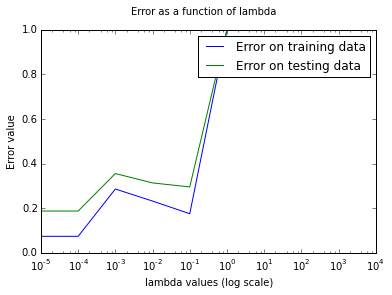

In [12]:
%matplotlib inline
LambdaValues = [10**(i) for i in np.arange(-5,5)]
max_epochs = 5
train_loss_list = list()
test_loss_list = list()
trainLoss = 0
testLoss = 0

for Lambda in LambdaValues:
    trainLoss,testLoss,theta = pegasosAlgorithmII(Lambda,max_epochs)
    train_loss_list.append(trainLoss)
    test_loss_list.append(testLoss)
    
print test_loss_list
plt.plot(LambdaValues, train_loss_list , label= "Error on training data")
plt.plot(LambdaValues, test_loss_list , label= "Error on testing data")
plt.xscale('log')
#plt.yscale('log')
plt.xlabel('lambda values (log scale)')
plt.ylabel('Error value')
plt.suptitle('Error as a function of lambda')
plt.legend()
plt.show()
plt.savefig("RegularizationPath.png")
plt.clf()


    

## So As we can see above in plot I got the minimum testing error approximately at lambda = 10**(-4)

##  Error Analysis

In [32]:
from operator import itemgetter

def findMisclassified(w, X, y):
    n = len(X)
    misclassified = []
    predictionlist = calculate_prediction(X, y, w)
    for i in range(n):
        X_i = X[i]
        prediction = predictionlist[1]
        misclassified.append([])
        misclassified[i].append(["prediction =",dotProduct(w, X_i),"true label =",y[i]])
        misclassified[i].append(["word","wixi","wi","xi"])
        if prediction*y[i] < 0 :
            a = {}
            for f, v in X_i.items():
                a[f] = w.get(f, 0) * v 
                word = f
                wixi = w.get(f, 0) * v
                wi = w.get(f, 0)
                xi = v
                misclassified[i].append([word,wixi,wi,xi])
    return misclassified

In [35]:
misclassified = findMisclassified(theta, X_test, y_test)
misclassified[0]

[['prediction =', -12.583311117030107, 'true label =', -1],
 ['word', 'wixi', 'wi', 'xi'],
 ['more', -0.0799786723540592, -0.0799786723540592, 1],
 ['summer', 1.3996267661955244, 0.46654225539850813, 3],
 ['all', -1.4396161023723835, -0.7198080511861917, 2],
 ['being', 0.3465742468674762, 0.3465742468674762, 1],
 ['over', 0.0399893361770296, 0.0399893361770296, 1],
 ['queen', 0.10663822980541227, 0.10663822980541227, 1],
 ['actress', 0.27992535323915035, 0.27992535323915035, 1],
 ['keanu', -0.1732871234337381, -0.1732871234337381, 1],
 ['four', 0.37323380431894293, 0.37323380431894293, 1],
 ['windy', 0, 0, 1],
 ['geller', -0.0399893361770296, -0.0399893361770296, 1],
 ["90's", 0.05331911490270613, 0.05331911490270613, 1],
 ['illogical', -0.18661690215947146, -0.18661690215947146, 1],
 ["five's", 0, 0, 1],
 ['love', 0.7864569448147449, 0.7864569448147449, 1],
 ['bunch', -0.6931484937349524, -0.6931484937349524, 1],
 ['cut', 0.026659557451353066, 0.013329778725676533, 2],
 ['based', 0.18

So If we observe, our algorithm is assigning higher weights to the common words like "a,an,the,for" which occurs frequently. As an example,

['the', 13.596374300186199, 0.3998933617701823, 34]

for word 'the' = wixi value is "13.60" which is very high. 

## This words can make difference in our prediction. So we should remove these words also known as "STOP WORDS". Or we can use "TF:IDF" which will asign the weights according to count of word in document.


##  Features

In [38]:
stop_words = ["the","a","and","to","of","with","in","is","as","for"]

#{'the': 31, 'a': 21, 'to': 20, 'and': 12, 'his': 11, 'of': 11, 'with': 11, 'in': 10,
# 'her': 8, 'is': 7, 'as': 7, 'but': 6, 'that': 5, 'on': 5, 'or': 5, 'an': 5, 'from': 4,
# 'not': 4, 'sam': 4, 'have': 4, "it's": 4, 'it': 4, 'for': 4, 'happy': 4, 'again': 4, 
# 'accidents': 4, 'this': 3, 'over': 3, 'without':
for word in stop_words:
    for i in range(len(X_train)):
        if X_train[i][word]>0:
            X_train[i][word]=0

    for i in range(len(X_test)):
        if X_test[i][word]>0:
            X_test[i][word]=0


In [39]:
def pegasosAlgorithmII(lamdbaValue, max_epochs):    
    #X = pickle.load( open( "Xtrain.p", "rb" ) )
    #y = pickle.load( open( "ytrain.p", "rb" ) )
    print 
    print "For Lambda :",lamdbaValue
    X = X_train
    y = y_train
    numInstances = len(X)
    avg_run_time = 0
    total_run_time = 0
    start_time = 0
    stop_time = 0
    epoch_total_runtime = list()
    lambdaValue = lamdbaValue
  
    s = 1
    W = dict()    
    t = 2       # Starting the range at 2 prevents W from being undefined
    
    for epoch in range(max_epochs):  
        print "Running epoch #",epoch
        start_time = timeit.default_timer() 
        for j in range(numInstances):        
            t = t + 1
            eta_t = 1 / (t * lambdaValue)

            margin = y[j] * dotProduct(W, X[j])
            s = (1 - (eta_t * lambdaValue)) * s

            if s == 0:
                s = 1
                W = dict()

            if margin < (1 / s):  # if misclassified               
                increment(W, (1/s) * eta_t * y[j], X[j])        # updates W in place   

            #else:                
            #    for key in W:    
            #        W[key] *=  s      
        stop_time = timeit.default_timer()
        total_run_time = stop_time - start_time
        epoch_total_runtime.append(total_run_time)
    increment(W, s-1, W)    # rescales W      
    #return W

    theta = W
    print "On Training :"
    train_loss = calculate_error(X_train, y_train, theta)
    print "On Testing :"
    test_loss = calculate_error(X_test, y_test, theta)
    plt.plot(range(max_epochs), epoch_total_runtime , label= "Loss on testing data")
    #plt.xscale('log')
    plt.xlabel('epoch number')
    plt.ylabel('Time taken by the pegasos')
    #plt.show()
    plt.savefig("pegasos2.png")
    plt.clf()
    avg_time = float(sum(epoch_total_runtime)/len(epoch_total_runtime))
    print 'Average runtime for pegasos2 Algorithm method :',avg_time
    print 
    sorted_w = sorted(theta.items(), key=operator.itemgetter(1),reverse=True)
    print sorted_w[0:10]
    return train_loss,test_loss,theta
    

train_loss,test_loss,theta = pegasosAlgorithmII(10**(-2), 5)


For Lambda : 0.01
Running epoch # 0
Running epoch # 1
Running epoch # 2
Running epoch # 3
Running epoch # 4
On Training :
Accuracy : 0.942666666667
Error : 0.0573333333333
On Testing :
Accuracy : 0.802
Error : 0.198
Average runtime for pegasos2 Algorithm method : 0.238144397736

[('fun', 1.0263929618768088), ('jackie', 0.8797653958945375), ('many', 0.8664356171689178), ('best', 0.826446280991604), ('sometimes', 0.7731271660891252), ('evil', 0.7464676086378859), ('he', 0.7198080511861917), ('hilarious', 0.666488936283713), ('perfectly', 0.666488936283713), ('well', 0.666488936283713)]


In [40]:
error = calculate_percent_error(theta,X_test, y_test)
print "error : ",error

error :  0.198


## So I removed the stopwords ["the","a","and","to","of","with","in","is","as","for"] and I improved error from  0.224 to 0.198. 